# Importing Libraries + Setting Path.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

path = r'C:\Users\Chaot\Python stuff\07 - Basics of Machine Learning for Analysts'

# Importing Data.

In [2]:
cleaned = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'cleaned_weather.csv'), index_col = False)
cleaned

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,2,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,0,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,2,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,1,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [3]:
pleasant = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Adding 'date' column for 'cleaned' df for decade selection.

In [4]:
cleaned = pd.concat([pleasant[['DATE']],cleaned],axis=1)
cleaned

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,20221028,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,20221029,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,20221030,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


### Selecting the years 2000 - 2009.

In [5]:
cleaned_2ks = cleaned[cleaned['DATE'].astype(str).str.startswith('200')] 
pleasant_2ks = pleasant[pleasant['DATE'].astype(str).str.startswith('200')] 
cleaned_2ks = cleaned_2ks.drop(['DATE'], axis = 1)
pleasant_2ks = pleasant_2ks.drop(['DATE'], axis = 1)

In [6]:
print(cleaned_2ks.shape)
print(pleasant_2ks.shape)

(3653, 135)
(3653, 15)


# Random Forest 1 - Years 2000-2009.

In [7]:
tf.random.set_seed(42)

In [8]:
X = cleaned_2ks
y = pleasant_2ks
X

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,7,...,0.7,6,0.89,1.0235,0.22,0.10,0.7,6.6,2.1,11.0
14611,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,...,2.0,8,0.92,1.0177,0.13,0.42,0.0,9.6,7.3,10.6
14612,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,5,...,2.8,4,0.79,1.0154,0.22,1.05,1.2,8.6,7.3,9.9
14613,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,7,...,4.6,6,0.76,1.0099,0.36,0.34,3.5,8.1,5.0,7.7
14614,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,7,...,2.9,7,0.81,0.9957,0.12,0.33,0.0,7.7,4.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,7,0.80,1.0118,0.37,0.18,2.3,1.0,-3.9,5.5,8,...,-2.7,4,0.72,1.0039,0.37,0.01,4.7,7.2,5.8,8.5
18259,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,4.8,4,...,2.4,8,0.70,0.9975,0.22,1.25,0.0,4.8,1.4,8.3
18260,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,10.0,6,...,0.8,8,0.88,0.9866,0.12,2.84,0.0,3.4,2.6,4.2
18261,8,0.92,0.9979,0.18,1.54,0.0,8.5,7.5,11.5,6,...,-7.4,8,0.87,0.9862,0.12,1.46,0.0,3.1,2.1,4.2


In [9]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [10]:
y = pleasant_2ks.max(axis=1)
print('Shape of y', y.shape)
print('Unique values in y:', y.unique())

Shape of y (3653,)
Unique values in y: [0 1]


In [11]:
y = y.to_numpy().reshape(-1)
y.shape

(3653,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922,)
(731, 135) (731,)


In [13]:
clf = RandomForestClassifier()

In [14]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
grid_space = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']
}

In [15]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))


Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Search took 1.4164020737012228 minutes


In [16]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.9691991786447639


In [17]:
# Create a random forest classifier using the best results from the searches

clf = RandomForestClassifier(
    n_estimators = 100, 
    max_depth=None, 
    max_features=15, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    criterion = 'gini'
)

In [18]:
# Train the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=15, min_samples_leaf=2)

In [19]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9794801641586868


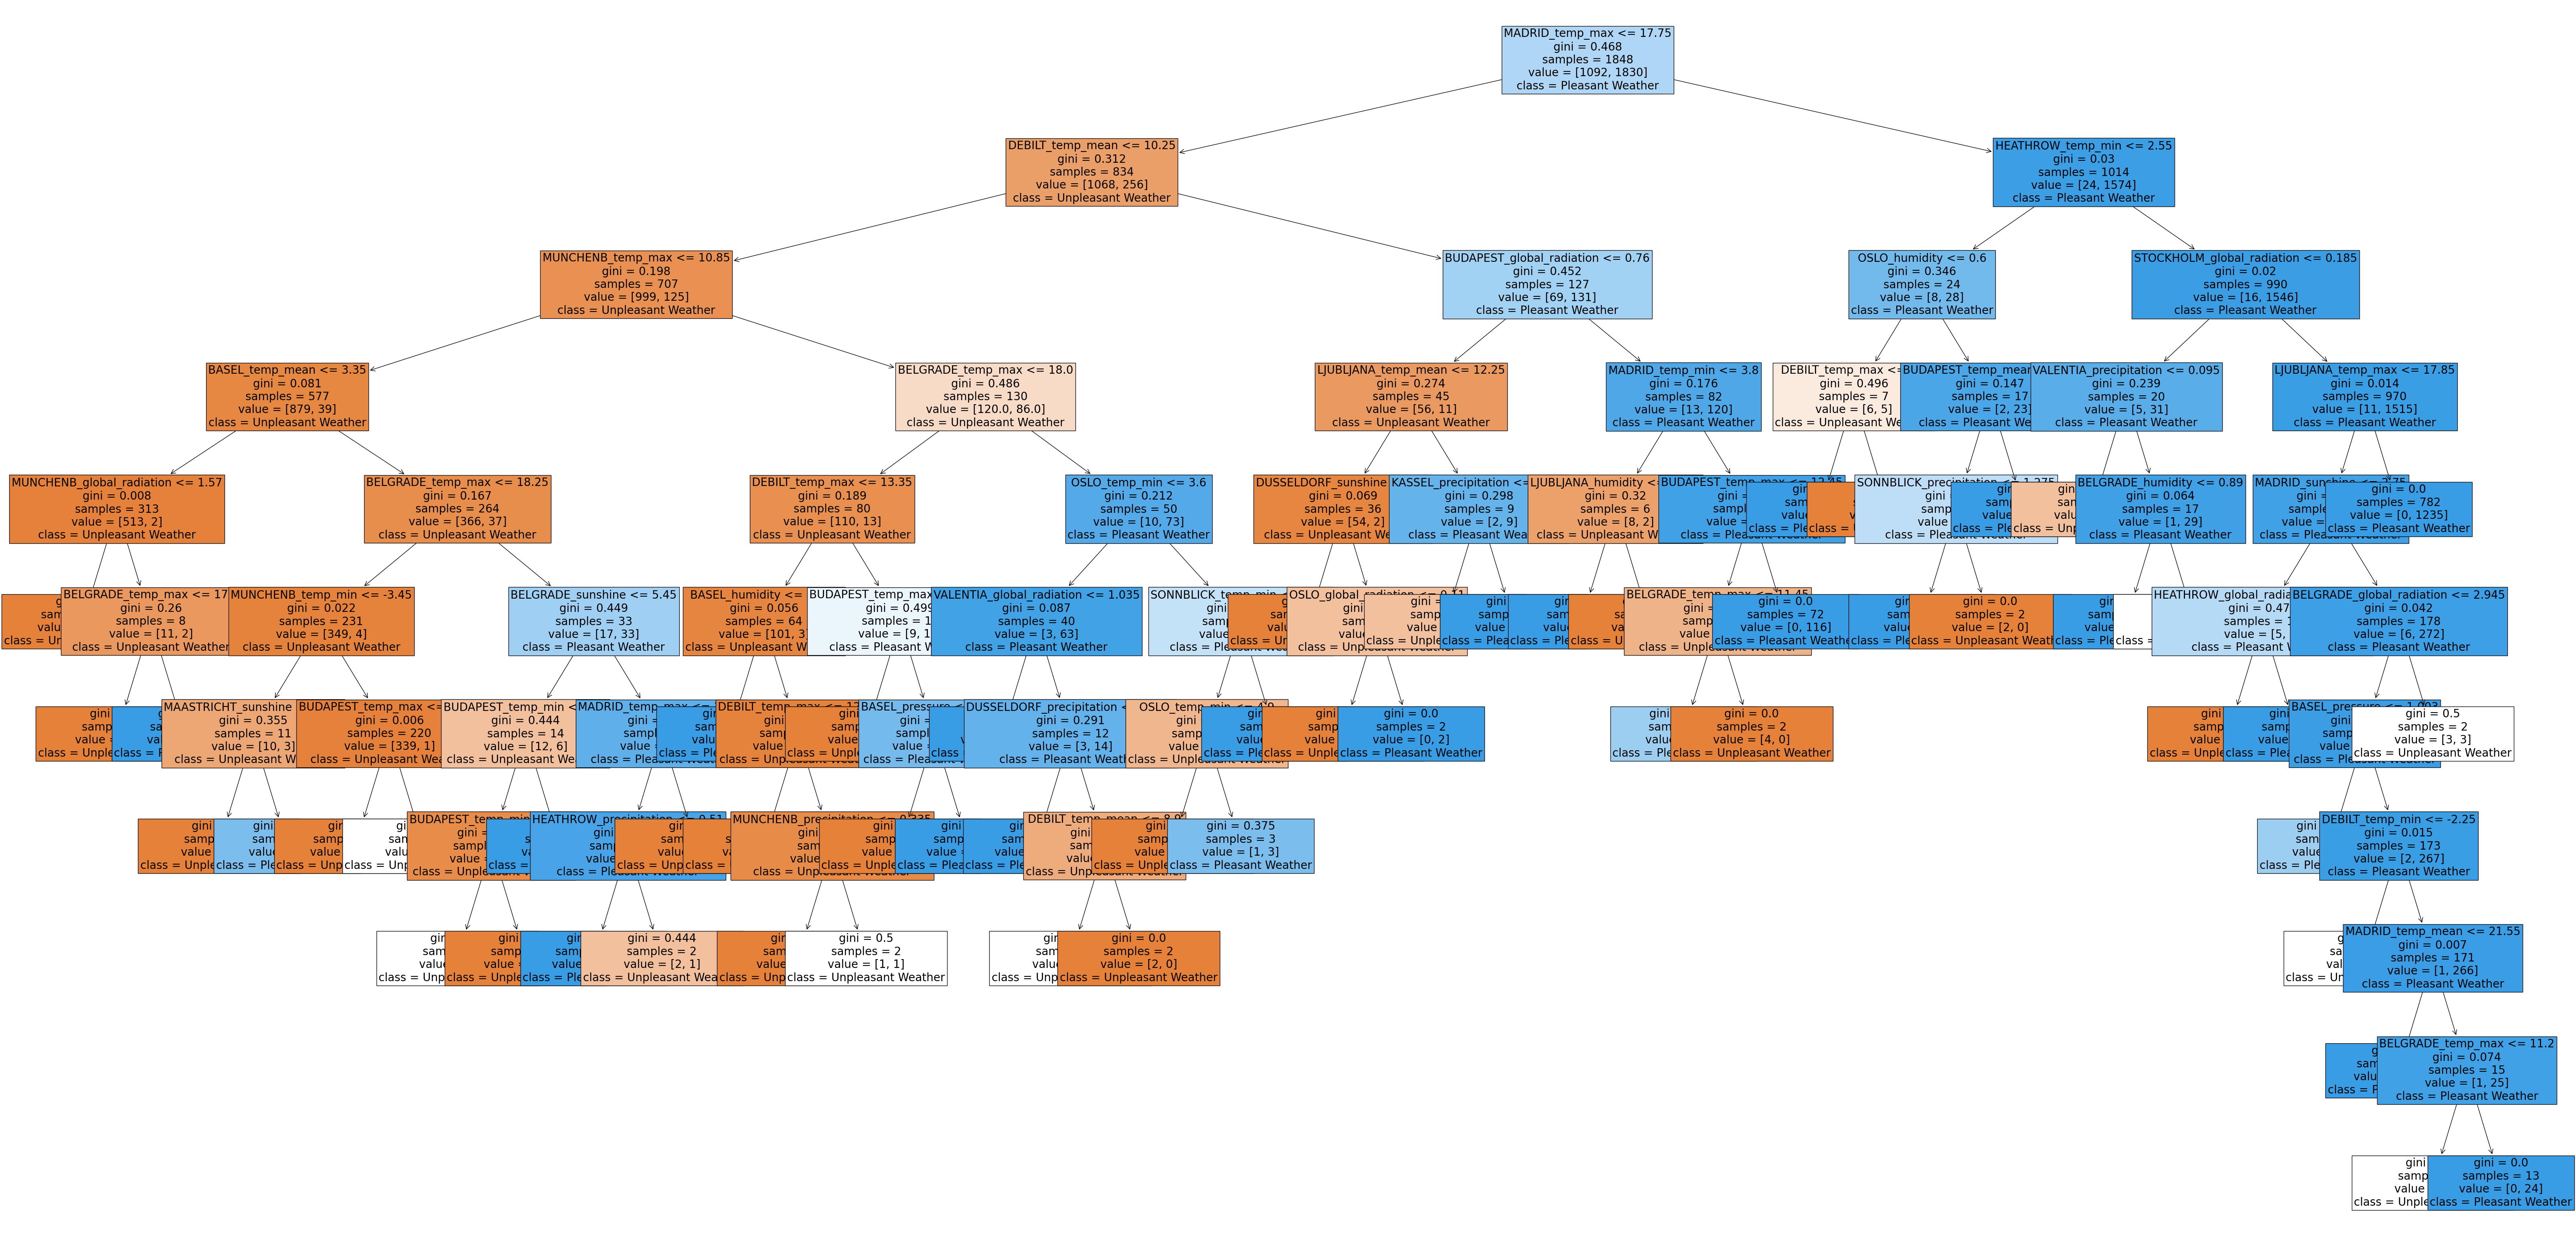

In [20]:
# Plot random forest (2000s)

plt_1 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, feature_names=cleaned_2ks.columns, class_names=['Unpleasant Weather', 'Pleasant Weather'], filled=True)
plt.savefig(os.path.join(path, 'Unsupervised','2.4_2000s_forest_grid.png'))
plt.show();

## Important Weatherstations for Random Forest 1.

In [21]:
feature_importances = clf.feature_importances_
print('Feature Importances:', feature_importances)
print(feature_importances.shape)

Feature Importances: [0.0002963  0.00107058 0.00098095 0.00187713 0.00055674 0.00048283
 0.028002   0.00190236 0.03004428 0.0011709  0.00353754 0.00100184
 0.0036179  0.00402284 0.00413127 0.03385065 0.00503266 0.02772819
 0.0006551  0.00132058 0.00095088 0.0055308  0.00209698 0.00155978
 0.07576147 0.01526987 0.03958251 0.00053246 0.00062425 0.00066696
 0.00253477 0.0005337  0.00089554 0.00264618 0.0011351  0.02162104
 0.00024564 0.00096088 0.00066913 0.00240063 0.00050518 0.00074401
 0.00125247 0.00111904 0.02220408 0.00041981 0.00078957 0.00068296
 0.00199607 0.00070859 0.00074421 0.00789834 0.00160197 0.00039178
 0.02613579 0.00057036 0.00069421 0.00154568 0.00069052 0.00074737
 0.02702896 0.0007072  0.03153332 0.00025864 0.0009242  0.00079613
 0.00264316 0.00083702 0.00124932 0.07211411 0.00317828 0.03603912
 0.0002231  0.00077388 0.00065071 0.00170425 0.00052854 0.00086106
 0.00807526 0.00123542 0.01464056 0.00142775 0.00254698 0.00218531
 0.00665245 0.00308287 0.00520164 0.07967

In [22]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances = feature_importances.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances.shape)

Reshaped Importances Shape: (1, 15, 9)


In [23]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances = np.sum(reshaped_importances[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances.shape)
print("Collapsed Importances:", collapsed_importances)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.06521318 0.08409381 0.14272796 0.03119001 0.03010106 0.0152333
 0.08965341 0.11803998 0.02869278 0.28158664 0.05785088 0.01430493
 0.01460774 0.01719194 0.00951239]


In [24]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [25]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances
})

In [26]:
# Sort by importance for chart readability
collapsed_importances = collapsed_importances.sort_values(by='Importance', ascending=False)
print('Collapsed Feature Importances:')
print(collapsed_importances)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.281587
2         BUDAPEST    0.142728
7        LJUBLJANA    0.118040
6           KASSEL    0.089653
1         BELGRADE    0.084094
0            BASEL    0.065213
10        MUNCHENB    0.057851
3           DEBILT    0.031190
4       DUSSELDORF    0.030101
8       MAASTRICHT    0.028693
13       STOCKHOLM    0.017192
5         HEATHROW    0.015233
12       SONNBLICK    0.014608
11            OSLO    0.014305
14        VALENTIA    0.009512


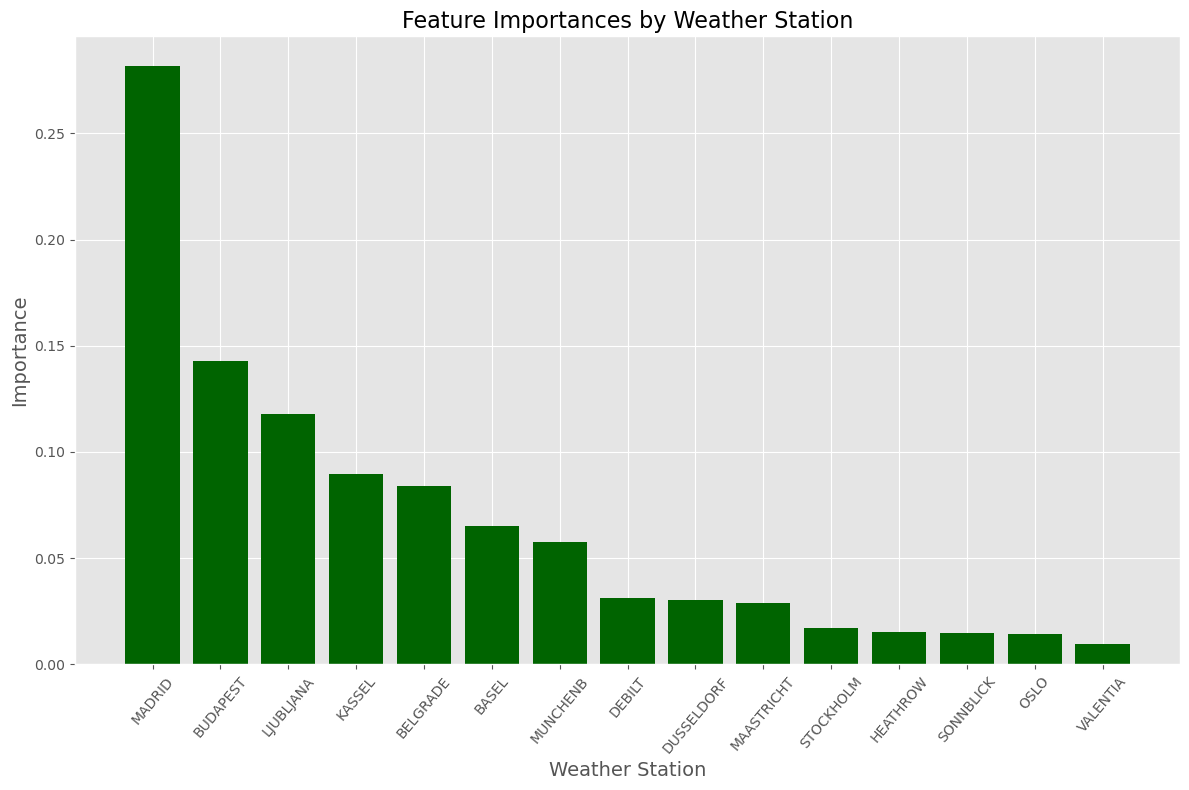

In [27]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances['Weather Station'], collapsed_importances['Importance'], color='darkgreen')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Unsupervised','2.4_2000s_weather_stations_grid.png'), bbox_inches = 'tight')
plt.show()

# Pulling One weatherstation with all years - Madrid.

In [28]:
madrid = cleaned[cleaned.columns[cleaned.columns.astype(str).str.startswith('MADRID')]]
p_madrid = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('MADRID')]]

In [29]:
print(madrid.shape)
print(p_madrid.shape)

(22950, 9)
(22950, 1)


In [30]:
# Create matrices
y = p_madrid.max(axis=1)

# Check shape
print('Shape of y', y.shape)
print('Unique values in y', y.unique())

Shape of y (22950,)
Unique values in y [0 1]


In [31]:
# Ensure y has the correct shape
y = y.to_numpy().reshape(-1)

# Check shape
print(y.shape)

(22950,)


In [32]:
# Create X matrix
X = madrid.to_numpy()

# Check shapes of the matrices
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=127)

# Check shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [34]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=15, min_samples_leaf=2)

In [35]:
# Perform the predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


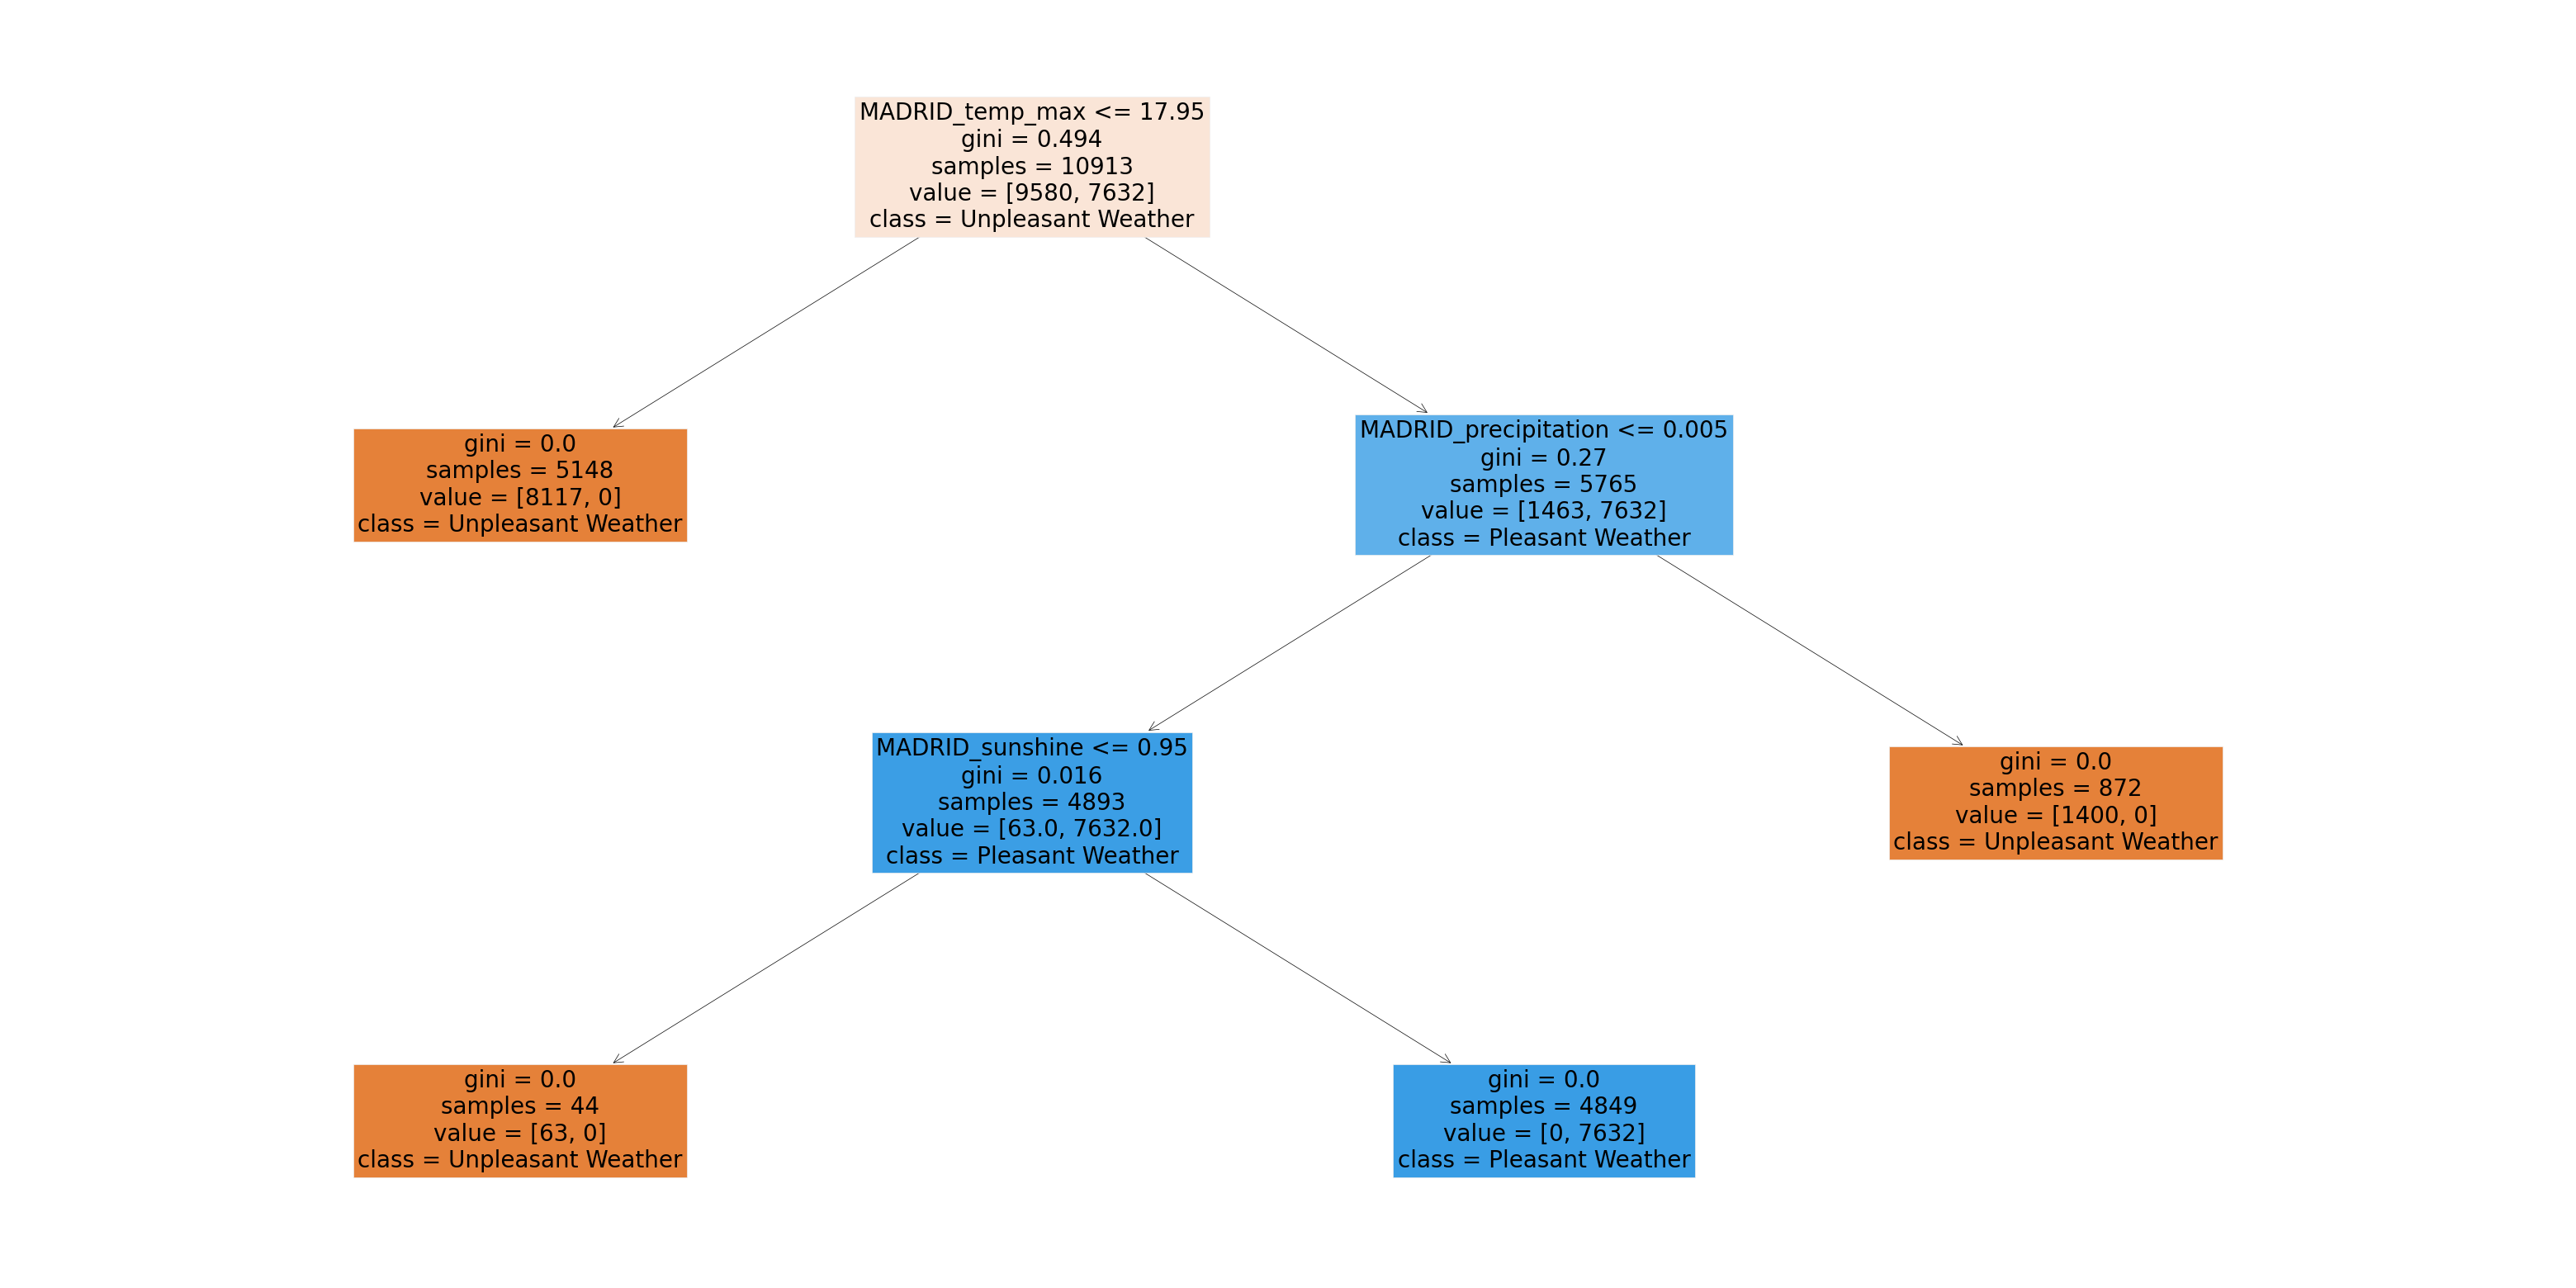

In [36]:
# Plot random forest (Madrid)
plt_3 = plt.figure(figsize=(40,20))
plot_tree(clf.estimators_[5], fontsize = 20, feature_names=madrid.columns, class_names=['Unpleasant Weather','Pleasant Weather'], filled=True)
plt.savefig(os.path.join(path, 'Unsupervised','2.4_madrid_forest_grid.png'), bbox_inches = 'tight')
plt.show();

## Important Measurements Madrid.

In [37]:
feature_importances = clf.feature_importances_
print('Feature Importances:', feature_importances)
print(feature_importances.shape)

Feature Importances: [0.         0.         0.         0.         0.27210239 0.014454
 0.         0.         0.71344361]
(9,)


In [38]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [39]:
# Create a dataframe to associate observation measurements with their importances
importances_df = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances
})

In [40]:
# Sort by importance for chart readability
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df)

Feature Importance:
        Measurement  Importance
8          temp_max    0.713444
4     precipitation    0.272102
5          sunshine    0.014454
0       cloud_cover    0.000000
1          humidity    0.000000
2          pressure    0.000000
3  global_radiation    0.000000
6         temp_mean    0.000000
7          temp_min    0.000000


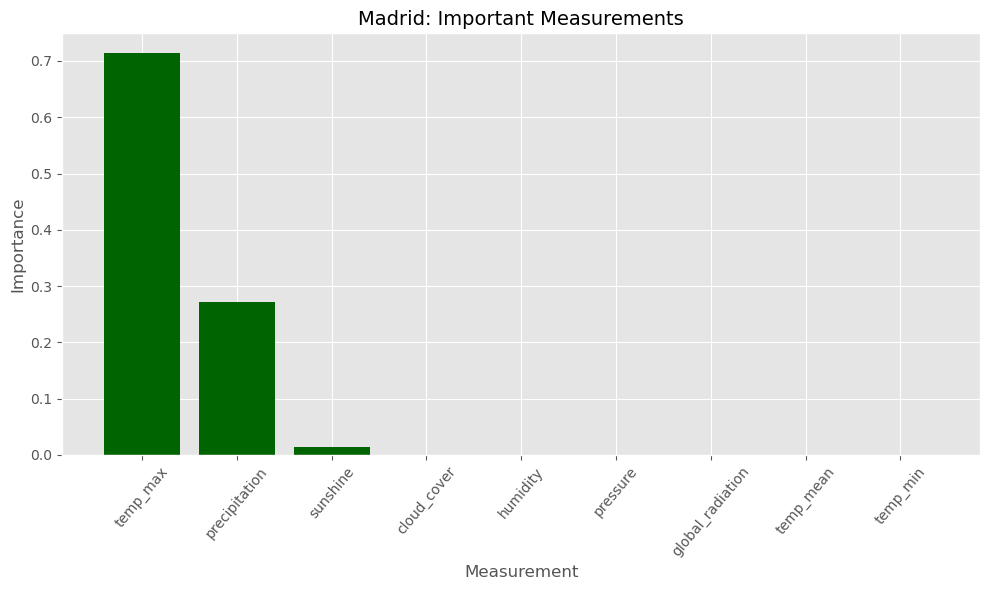

In [41]:
plt.style.use('ggplot')
plt_4 = plt.figure(figsize=(10, 6))
plt.bar(importances_df['Measurement'], importances_df['Importance'], color='darkgreen')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Important Measurements", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Unsupervised', '2.4_madrid_important_measurements_grid.png'), bbox_inches='tight')
plt.show()